# <center> Central Limit Theorem and Confidence Intervals

## <center> Central Limit Theorem </center> <br><br>
<center> The distribution of sample means is approximately normal, given enough samples, and despite the underlying distribution.

### <center> Features

<center> The mean of the sample means will be approximately the population mean.

<center> The variance of the sample means will be approximately equal to the population variance divided by the sample size.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
normal = np.random.normal(50,15,1000)

In [3]:
uniform = np.random.uniform(1,25,1000)

In [4]:
exponential = np.random.exponential(5,1000)

In [5]:
beta = np.random.beta(0.5,0.5,1000)

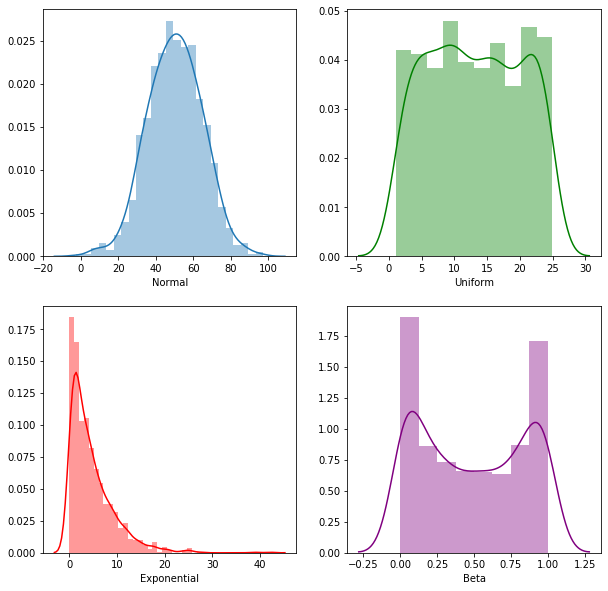

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.distplot(normal, ax=axes[0,0],axlabel='Normal')
sns.distplot(uniform, color='green', ax=axes[0,1],axlabel='Uniform')
sns.distplot(exponential, color='red', ax=axes[1,0],axlabel='Exponential')
sns.distplot(beta, color='purple', ax=axes[1,1],axlabel='Beta');

In [8]:
df = pd.DataFrame()
df['Dist'] = ['Normal', 'Uniform', 'Exponential', 'Beta']
df['Mean'] = [normal.mean(), uniform.mean(), exponential.mean(), beta.mean()]
df['Variance'] = [normal.var(), uniform.var(), exponential.var(), beta.var()]
df.index=df['Dist']
df.drop('Dist',axis=1,inplace=True)
df

,Mean,Variance
Dist,,
Normal,50.289102,214.412429
Uniform,13.079633,49.599470
Exponential,4.759373,22.440013
Beta,0.487720,0.122827


In [9]:
sample_size = 10
sample_count = 50

normal_samples = [np.random.choice(normal, sample_size, replace=True) for x in range(sample_count)]
normal_sample_means = [np.mean(x) for x in normal_samples]

uniform_samples = [np.random.choice(uniform, sample_size, replace=True) for x in range(sample_count)]
uniform_sample_means = [np.mean(x) for x in uniform_samples]

exponential_samples = [np.random.choice(exponential, sample_size, replace=True) for x in range(sample_count)]
exponential_sample_means = [np.mean(x) for x in exponential_samples]

beta_samples = [np.random.choice(beta, sample_size, replace=True) for x in range(sample_count)]
beta_sample_means = [np.mean(x) for x in beta_samples]

sample_means = [normal_sample_means, uniform_sample_means, exponential_sample_means, beta_sample_means]

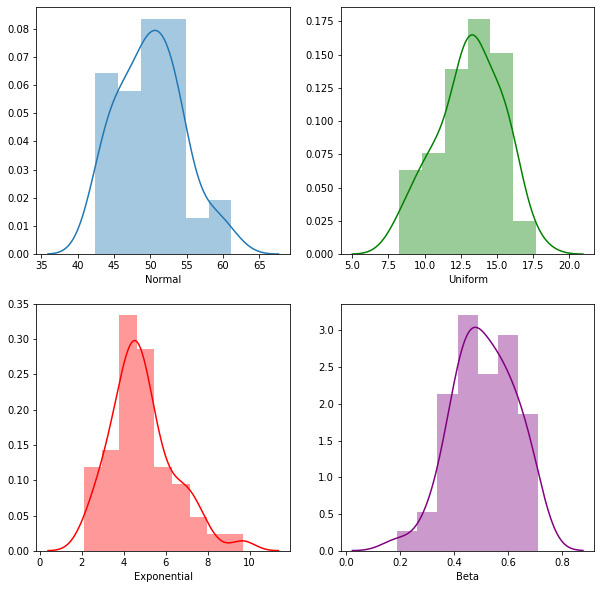

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.distplot(normal_sample_means, ax=axes[0,0],axlabel='Normal')
sns.distplot(uniform_sample_means, color='green', ax=axes[0,1],axlabel='Uniform')
sns.distplot(exponential_sample_means, color='red', ax=axes[1,0],axlabel='Exponential')
sns.distplot(beta_sample_means, color='purple', ax=axes[1,1],axlabel='Beta');

In [12]:
df.insert(1,'Sample Mean',[np.mean(x) for x in sample_means])
df.insert(3,'Sample Variance',[np.var(x) for x in sample_means])
df

,Mean,Sample Mean,Variance,Sample Variance
Dist,,,,
Normal,50.289102,50.003623,214.412429,19.552729
Uniform,13.079633,13.099270,49.599470,4.852851
Exponential,4.759373,4.881421,22.440013,2.247614
Beta,0.487720,0.510471,0.122827,0.012724


In [13]:
df['Expected Variance'] = df['Variance']/sample_size
df

,Mean,Sample Mean,Variance,Sample Variance,Expected Variance
Dist,,,,,
Normal,50.289102,50.003623,214.412429,19.552729,21.441243
Uniform,13.079633,13.099270,49.599470,4.852851,4.959947
Exponential,4.759373,4.881421,22.440013,2.247614,2.244001
Beta,0.487720,0.510471,0.122827,0.012724,0.012283


## <center> The more samples you take and the larger those samples are, the closer to a normal distribution the sample means will be.

Scoops Ahoy Corporate wants you to estimate the average annual revenue for its shops. They tell you the standard deviation of revenue is 50,000. Also, they recently sampled 30 stores and calculated an average annual revenue of $450,000. If they want to be 92% certain of the true average annual revenue across all stores, what interval of revenue should you give them?

In [ ]:
# Need confidence intervale to solve this

# <center>Confidence Intervals 

<center> <img src='norm_dist2.png'>

Finding the Z-critical value for a given percentage.

In [14]:
stats.norm.ppf(0.95)

1.6448536269514722

<center><img src='z_crit1.png'>

In [15]:
stats.norm.ppf(0.95+(1-.95)/2)

1.959963984540054

<center><img src='z_crit2.png'>

68% confidence

In [16]:
stats.norm.ppf(.68+(1-.68)/2)

0.9944578832097535

Scoops Ahoy Corporate wants you to estimate the average annual revenue for its shops. They tell you the standard deviation of revenue is 50,000. Also, they recently sampled 30 stores and calculated an average annual revenue of 450,000. If they want to be 92% certain of the true average annual revenue across all stores, what interval of revenue should you give them?

In [17]:
z = stats.norm.ppf(0.92+(1-0.92)/2)
z

1.7506860712521692

<center>Margin of Error = z ∗ σ / √n

In [19]:
sigma = 50000
n = 30
moe = z*sigma/np.sqrt(n)
moe

15981.504205581827

In [20]:
lower_interval, upper_interval = 450000-moe, 450000+moe
print('With a 92% confidence level, the average revenue is between', int(lower_interval), 'and', int(upper_interval), 'dollars per year.')

With a 92% confidence level, the average revenue is between 434018 and 465981 dollars per year.


# <center> Activity

1) Professor Juniper has taken a random Pokemon in the wild. She tells you that the standard deviation of speed for all Pokemon is 15. She has tasked you with estimated the average speed of all Pokemon with a confidence level of 85%. Using the data of the sample found in pokemon_sample.csv, what interval should you report?

In [30]:
data = pd.read_csv('pokemon_sample.csv')
data_speed = data['Speed']
mean = data_speed.mean()
n = len(data_speed)
z = stats.norm.ppf(0.85+(1-0.85)/2)
sigma = 15
moe = z*sigma/np.sqrt(n)
print('The interval is ' + str(mean-moe) +  ' and ' + str(mean+moe))

The interval is 59.810851341256495 and 66.63914865874351


2) Professor Juniper has previously studied the height of all Pokemon. From a sample of 30 Pokemon, she calculated the average height to be between 25 and 40 inches, with a confidence of 90%. What was the average height of those 30 Pokemon? What is the standard deviation of Pokemon height for the population? 

In [33]:
n = 30
sample_mean = (40+25)/2
z = stats.norm.ppf(0.90+(1-0.90)/2)
moe = 40-sample_mean
sigma = (moe*np.sqrt(n))/z
print('The average height for the sample of pokemon is: ' + str(sample_mean))
print('The standard deviaton for that sample of pokemon is: ' + str(sigma))

The average height for the sample of pokemon is: 32.5
The standard deviaton for that sample of pokemon is: 24.974375312058942


What if we don't know the population standard deviation?

## <center> T-Distribution

<img src='t_dist.png'>

 ### <center>Standard Deviation of a Sample

<center><img src='standard_dev.png'>

In [34]:
sample = pd.read_csv('pokemon_sample.csv')['Speed']
s = np.std(sample, ddof = 1)
s

26.788332228598012

Confidence intervals for a T-distribution.

<center>Margin of Error = t ∗ σ / √n

<center>Consider we only have the sample of 30 Pokemon, what is the 90% confidence interval for the average speed of all Pokemon?

In [37]:
scale = np.std(sample, ddof=1)/np.sqrt(len(sample))

In [38]:
stats.t.interval(alpha = 0.90,                              # Confidence level
                 df= len(sample)-1,                         # Degrees of freedom
                 loc = sample.mean(),                       # Sample mean
                 scale = scale) 

(56.08853076560774, 70.36146923439225)

In [39]:
moe = stats.t.ppf(0.9+(1-.9)/2, len(sample)-1)*np.std(sample, ddof=1)/np.sqrt(len(sample))
sample.mean()-moe, sample.mean()+moe

(56.08853076560775, 70.36146923439225)

# <center> Activity

1)   Using a sample of data from home sales in King County (king_county_sample.csv), calculate a 95% confidence interval for the average home sale price.

In [45]:
data = pd.read_csv('king_county_sample.csv')
price = data['price']
scale = np.std(price, ddof=1)/np.sqrt(len(price))
stats.t.interval(alpha = 0.95, df= len(price)-1, loc = price.mean(), scale = scale) 

(421138.9309948561, 563134.4023384772)

2)   Is there a tighter 90% confidence interval for number of bedrooms or number of bathrooms?

In [53]:
bedrooms = data['bedrooms']
scale_bedrooms = np.std(bedrooms, ddof=1)/np.sqrt(len(bedrooms))
bedrooms_ci = stats.t.interval(alpha = 0.9, df= len(bedrooms)-1, loc = bedrooms.mean(), scale = scale_bedrooms) 
bathrooms = data['bathrooms']
scale_bathrooms= np.std(bathrooms, ddof=1)/np.sqrt(len(bathrooms))
bathrooms_ci = stats.t.interval(alpha = 0.9, df= len(bathrooms)-1, loc = bathrooms.mean(), scale = scale_bathrooms) 
difference_bedrooms = bedrooms_ci[1] - bedrooms_ci[0]
difference_bathrooms = bathrooms_ci[1] - bathrooms_ci[0]
print(difference_bedrooms)
print(difference_bathrooms)
print('bathrooms has a tighter confidence interval')

0.6615059207875476
0.46012577393043497
bathrooms has a tighter confidence interval


3) The 85% confidence interval found for the average salary of a data scientist was found to be 90,000 to 120,000. What was the sample size?

In [52]:
high = 120000
low = 90000
ci = 0.85
mean = (high+low) / 2
moe = high - mean
t = stats.t.ppf(ci+(1-ci)/2)
n = ((t*sigma)/moe)**2

TypeError: _parse_args() missing 1 required positional argument: 'df'

In [ ]:
include t value = 1.85